In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape


In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [3]:
# CNN Autoencoder Architecture
input_layer = Input(shape=(28, 28, 1))

# Encoder
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

# Latent Space
latent = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)

# Decoder
decoded = UpSampling2D((2, 2))(latent)
decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

In [4]:
# Compile Autoencoder
autoencoder_cnn = Model(inputs=input_layer, outputs=output_layer)
autoencoder_cnn.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,425 (435.25 KB)

 Trainable params: 111,425 (435.25 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train Autoencoder
history_cnn = autoencoder_cnn.fit(
    x_train, x_train,
    validation_data=(x_test, x_test),
    epochs=20,
    batch_size=256,
    shuffle=True
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 574ms/step - loss: 0.2150 - val_loss: 0.0744
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 110s 470ms/step - loss: 0.0735 - val_loss: 0.0698
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 473ms/step - loss: 0.0700 - val_loss: 0.0679
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 599ms/step - loss: 0.0682 - val_loss: 0.0670
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 155s 660ms/step - loss: 0.0673 - val_loss: 0.0663
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 621ms/step - loss: 0.0667 - val_loss: 0.0657
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 119s 504ms/step - loss: 0.0663 - val_loss: 0.0653
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 500ms/step - loss: 0.0656 - val_loss: 0.0649
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 118s 501ms/step - loss: 0.0653 - val_loss: 0.0646
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 116s 493ms/step - loss: 0.0649 - val_loss: 0.0645
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 114s 487ms/step - loss: 0.0645 - val_loss: 0.0641
Epoch 12

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


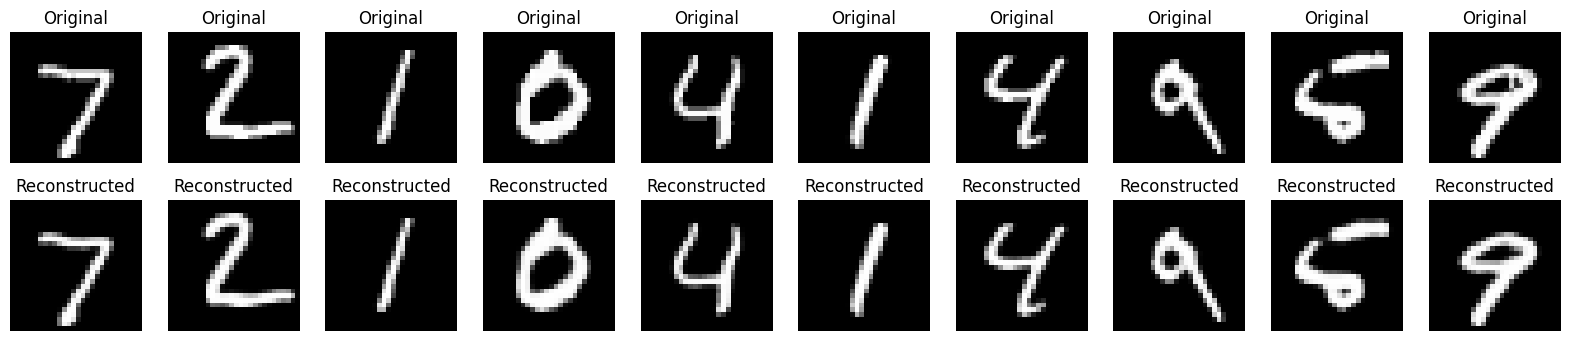

In [6]:
# Reconstruct and Visualize
reconstructed_cnn = autoencoder_cnn.predict(x_test)

# Plot Original and Reconstructed Images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_cnn[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()